In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stat
import statsmodels.api as smf
import statsmodels.formula.api as sm

### **IMPORTING DATA**

In [7]:
from google.colab import files
df = files.upload()
     

Saving 50_Startups.csv to 50_Startups (1).csv


In [8]:
df = pd.read_csv("50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### **DESCRIPTIVE ANALYSIS**

In [9]:
df.describe()   #There are no null values

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [10]:
df.info() 
df.dtypes    #checking Datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

*Since state is a Categorical feature we need to do some encoding or convert it into numerical values.*

In [11]:
df1=df.rename({"R&D Spend":'RnD',"Administration":'admin',"Marketing Spend":'marketing',"State":'state',"Profit":'profit'},axis=1)       #Renaming columns
df1.head()

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [12]:
df1.isnull().sum()       #checking for null values

RnD          0
admin        0
marketing    0
state        0
profit       0
dtype: int64

### *Note : There are no null values in our dataset*

In [13]:
df.duplicated()        #checking for duplicated values

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

### *Note : There are no duplicated values in our dataset.*

### **DETECTING OUTLIERS**

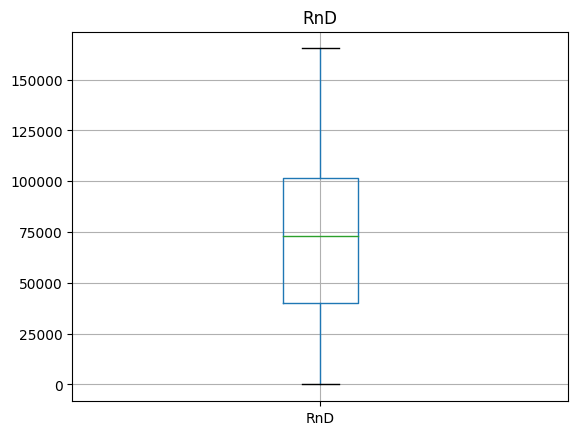

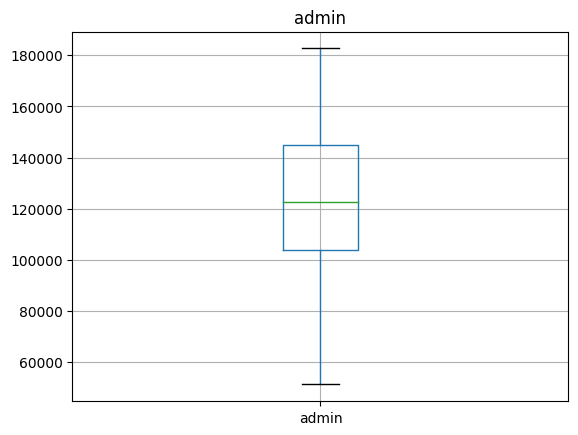

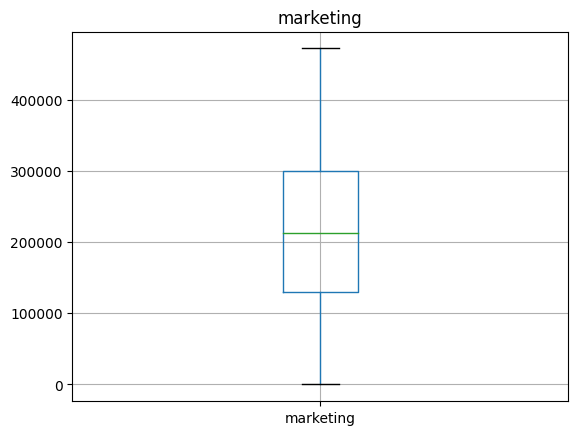

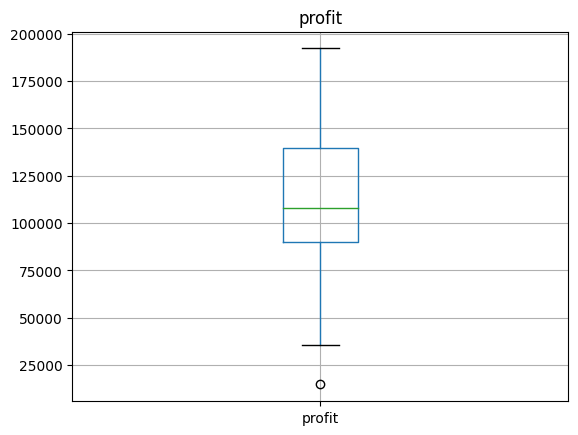

In [14]:
continuous_variable=[feature for feature in df1.columns if df1[feature].dtype!='O']

for feature in continuous_variable:
    df1.boxplot(column=feature)
    plt.title(feature)
    plt.show()


***Note : As we can see, there is an outlier in our dependent variable, Profit. In bigger datasets, outliers should be handled because the overall mean or standard deviation gets affected if the outliers are not removed which leads to redundancy in output of the model. However, outliers can be kept in smaller datasets to prevent data loss.***

OUTLIERS CAN BE REMOVED USING:

1.Median Imputation

2.Mean Imputation

3.Using IQR

Transforming variables using sqrt,cuberoot or log transformations can also eliminate outliers.

### **Building a model without removing outliers**

In [15]:
model1 = sm.ols("profit~RnD+admin+marketing", data = df1).fit()
# Finding rsquared values
model1.rsquared , model1.rsquared_adj 

(0.9507459940683246, 0.9475337762901719)

### **REMOVING OUTLIERS**

**By IQR**

In [16]:
Q1 = np.quantile(df1.profit,0.25)
Q3 = np.quantile(df1.profit,0.75)
med = np.median(df1.profit)
IQR = Q3 - Q1

upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
print('First Quantile=', Q1,'\n' 'Second Quantile=', med,'\n' 'Third Quantile=', Q3,'\n'
      'Inter-Quartile Range=', IQR,'\n' 'Upper Whisker=', upper_bound,'\n' 'Lower Whisker=', lower_bound)

First Quantile= 90138.9025 
Second Quantile= 107978.19 
Third Quantile= 139765.97749999998 
Inter-Quartile Range= 49627.07499999998 
Upper Whisker= 214206.58999999997 
Lower Whisker= 15698.290000000023


In [17]:
# identify outliers
outliers = [x for x in df1.profit if x < lower_bound or x > upper_bound]
print("Outliers:",outliers)

display(df1[df1.index.isin([49])])

Outliers: [14681.4]


,RnD,admin,marketing,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [18]:
df2=df1.drop(df1.index[[49]],axis=0).reset_index(drop=True)
df2

,RnD,admin,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### **Let's build one more model now again after removing the outliers.**

In [19]:
outlierless_model = sm.ols("profit~RnD+admin+marketing", data = df2).fit()
# Finding rsquared values
outlierless_model.rsquared , outlierless_model.rsquared_adj 

(0.9613162435129847, 0.9587373264138503)

### **As we can see, the accuracy of the outlier less model improved as compared to the previous model. So, let us continue with this model.**

Text(0.5, 1.0, 'Profit after removing outliers')

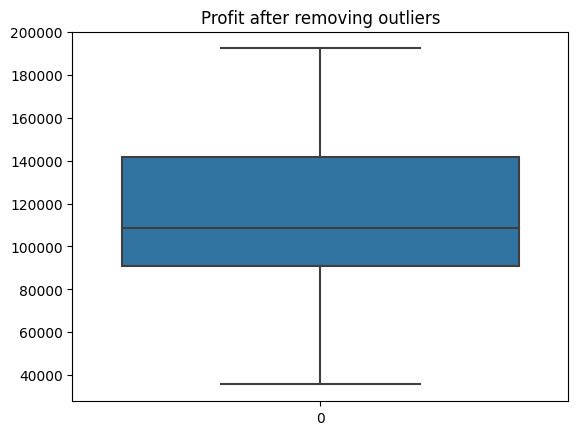

In [20]:
sns.boxplot(df2.profit)
plt.title('Profit after removing outliers')

### **EXPLORATORY DATA ANALYSIS**

*Visualizing the Relation between each independent Feature with respect to the Dependent Feature*

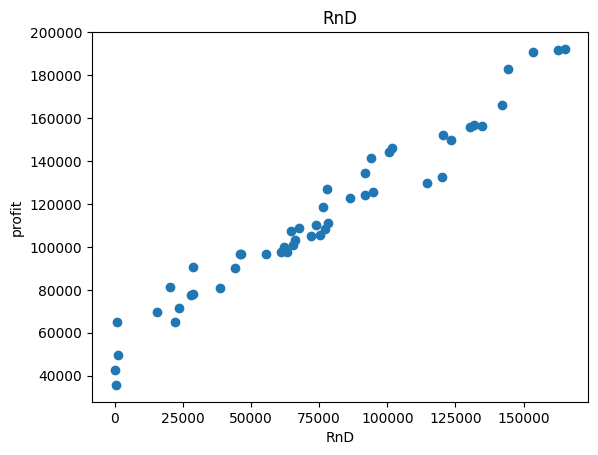

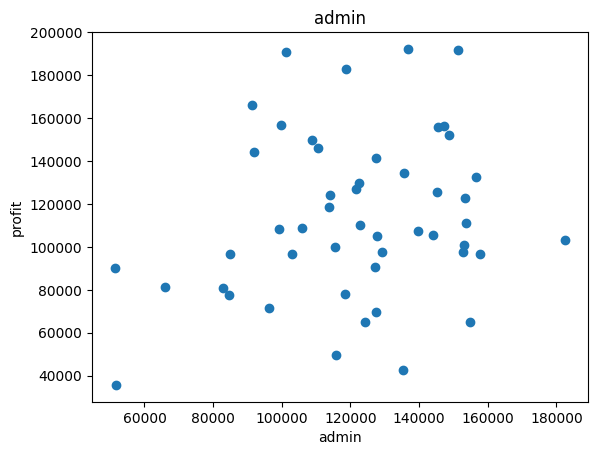

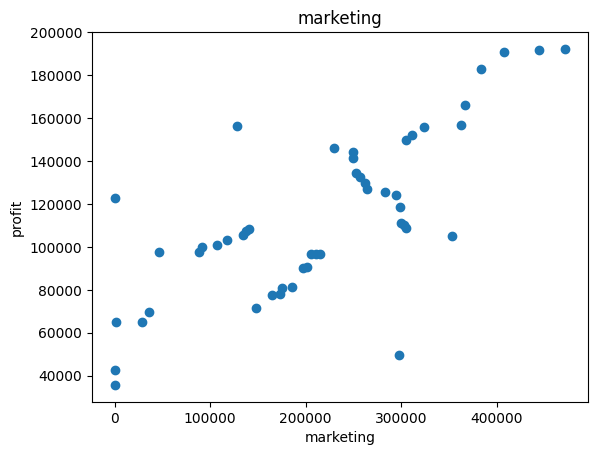

In [21]:
for feature in continuous_variable:
    if feature!="profit":        
        plt.scatter(df2[feature],df2['profit'])
        plt.xlabel(feature)
        plt.ylabel('profit')
        plt.title(feature)
        plt.show()

**Note: R&D feature has a good linear relation with Profit as compared to other features**

### **Correlation Analysis:**

In [22]:
df1.corr()

<ipython-input-22-49b3fcfeb4d1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,RnD,admin,marketing,profit
RnD,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
marketing,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


### **Notes:**

**1.As we can see, there is high collinearity between Profit and RnD. So, that variable will be considered first in model building which will be followed by Marketing and then admin. (Highest collinearity comes first)**

**2.Also, there is high collinearity existing between two independent variables RnD and Marketing. So, we shouldn't build a model where two of those variables exist.**


### **VISUALISING CORRELATION**

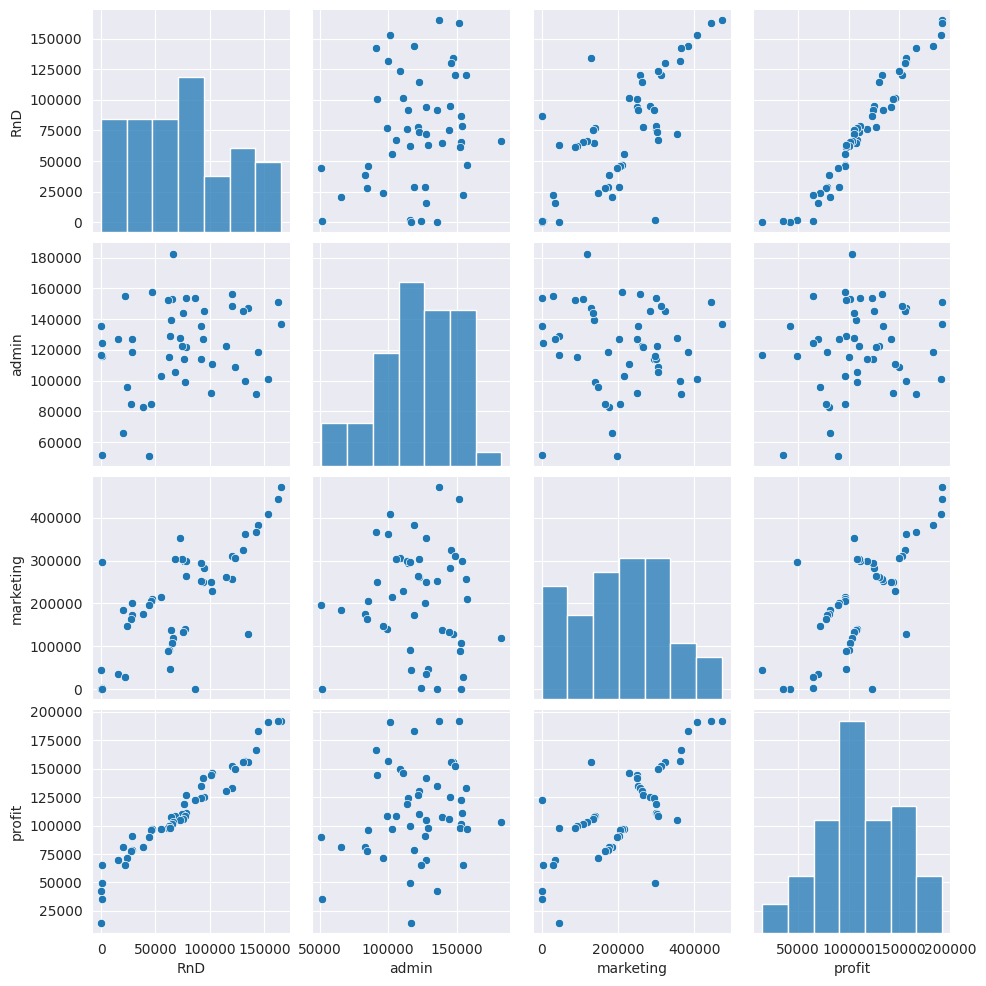

In [23]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)

**1. As we can see in the pair plot, Research and development are directly proportional to the investment that we can do.**

**2. The marketing spend seems to be directly proportional (though a little bit outliers are there) with the profit.**

**3. There is no relationship between the second column and profit i.e. our target column.**

### **Preparing a Model**

In [24]:
import statsmodels.formula.api as sm
model = sm.ols("profit~RnD+admin+marketing", data = df1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        06:11:05   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RnD            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing      0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Model Testing**

**Finding Coefficient Parameters (Beta0 and Beta1's values)**

In [25]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RnD              0.805715
admin           -0.026816
marketing        0.027228
dtype: float64

Assupmtion for multi linear Regression fails.

Feature should be independent of each other in order to avoid multicollinearity issues.

In [32]:
# Finding tvalues and pvalues
c= display(model.tvalues,model.pvalues)

print("Admin:",float(6.017551e-01))
print("Marketing:",float(1.047168e-01))

Intercept     7.626218
RnD          17.846374
admin        -0.525507
marketing     1.655077
dtype: float64

Intercept    1.057379e-09
RnD          2.634968e-22
admin        6.017551e-01
marketing    1.047168e-01
dtype: float64

Admin: 0.6017551
Marketing: 0.1047168


Here, Beta0(Intercept) p_value ~ 1

Hypothesis testing of X variable by finding test_statistics and P_values for Beta1 i.e ifP_value < α=0.05, H0 is rejected

**Null Hypothesis as Beta1=0 (No Slope)**

**Alternate Hypthesis as Beta1≠0 (Some or significant Slope)** 

Note: Since the p-value is not less than 0.05 for Administration and Marketing features, we fail to reject the null hypothesis. We do not have sufficient evidence to say that the sample data providing those features have any dependency towards the dependent variable.

**We are now going to perform Simple Linear Regression to separately check the dependency between those feature with Output variable**.

Let's first compare models by their R-Squared and p_values.

In [34]:
admin_slr_model = sm.ols("profit~admin", data = df1).fit()
# Finding tvalues and pvalues
display(admin_slr_model.tvalues, admin_slr_model.pvalues)

Intercept    3.040044
admin        1.419493
dtype: float64

Intercept    0.003824
admin        0.162217
dtype: float64

In [35]:
# Finding rsquared values
admin_slr_model.rsquared , admin_slr_model.rsquared_adj 

(0.04028714077757223, 0.020293122877105052)

In [37]:
marketing_slr_model = sm.ols("profit~marketing", data = df1).fit()
# Finding tvalues and pvalues
display(marketing_slr_model.tvalues, marketing_slr_model.pvalues)

Intercept    7.808356
marketing    7.802657
dtype: float64

Intercept    4.294735e-10
marketing    4.381073e-10
dtype: float64

In [38]:
# Finding rsquared values
marketing_slr_model.rsquared , marketing_slr_model.rsquared_adj 

(0.5591535746115515, 0.5499692740826254)

NOTES:

1.The p_value of Administration is greater than 0.5 hence by the test of independence, we fail to reject Null Hypothesis.

2.We have found lack of evidence to state that administration has any dependency with respect to Profit atleast in this testing

**Calculating VIF ( Variance Inflation Factor ) to check the dependency between two input variables**

In [39]:
# Method to calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
x = df1[['marketing','admin','RnD']]
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns
vif_data['VIF'] = [vif(x.values, i) for i in range(len(x.columns))]
vif_data.sort_values(by = ['VIF'])

,Features,VIF
1,admin,4.026406
0,marketing,7.593984
2,RnD,8.384571


**None of the variables has VIF>20, No Collinearity, but we cannot consider all varaibles in Regression equation**

As we can observe this test is not giving us much of an information to come up to an conclusion.

Let's try another approach that will justify our first test we conducted.

**Let's build two model in each model one of the feature will not be present and then we will come to an conclusion to remove which of the feature by comparing the model parameters**

In [51]:
model_with_adm= sm.ols('profit~RnD+admin', data= df1).fit()     #RnD + Adminstaration
model_with_adm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     426.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           7.29e-31
Time:                        06:51:17   Log-Likelihood:                -526.83
No. Observations:                  50   AIC:                             1060.
Df Residuals:                      47   BIC:                             1065.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.489e+04   6016.718      9.122      0.000    4.28e+04     6.7e+04
RnD            0.8621      0.030     28.589      0.000       0.801       0.923
admin         -0.0530      0.049     -1.073      0.289      -0.152       0.046
==============================================================================
Omnibus:                       14.678   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.449
Skew:                          -0.961   Prob(JB):                     3.63e-05
Kurtosis:                       5.474   Cond. No.                     6.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
model_with_marketing = sm.ols('profit~RnD+marketing', data= df1).fit()                #RnD + Marketing
model_with_marketing.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.16e-31
Time:                        06:51:40   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RnD            0.7966      0.041     19.266      0.000       0.713       0.880
marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note : While building a model using Marketing we got good R-squared, R-squared adjusted, p_value(Test of Independence) and F-statistics as compared to model with Adminstration feature.

### **Model Validation**
*Comparing different models with respect to their Root Mean Squared Errors*

In [53]:
RMSE = print('Adminstration Model=', np.sqrt(model_with_adm.mse_resid),'\n''Marketing Model=', np.sqrt(model_with_marketing.mse_resid))

Adminstration Model= 9401.608806315133 
Marketing Model= 9160.965816318318


**Let's compare the Root Mean Squared Error and check for the minimum value**

In [54]:
rmse_compare = {'Adminstration Model': np.sqrt(model_with_adm.mse_resid),'Marketing Model': np.sqrt(model_with_marketing.mse_resid)}
min(rmse_compare, key=rmse_compare.get)

'Marketing Model'

### **Note: The Model that was build without using Marketing feature performed very well.**

It scored minimumn Root mean squared error and maximum R-squared and adjusted R-squared.

Now,we are going to rebuild the model by dropping the Administration feature

In [49]:
final_model = sm.ols('profit~RnD+marketing', data=df1).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Wed, 19 Apr 2023   Prob (F-statistic):           2.16e-31
Time:                        06:44:11   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
RnD            0.7966      0.041     19.266      0.000       0.713       0.880
marketing      0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### **Predicting values**

In [50]:
predicted = pd.DataFrame()
predicted['RnD'] = df1.RnD
predicted['marketing'] = df1.marketing
predicted['Profit'] = df1.profit
predicted['Predicted_Profit'] = pd.DataFrame(final_model.predict(predicted[['RnD','marketing']]))
predicted

,RnD,marketing,Profit,Predicted_Profit
0,165349.20,471784.10,192261.83,192800.458625
1,162597.70,443898.53,191792.06,189774.659480
2,153441.51,407934.54,191050.39,181405.378097
3,144372.41,383199.62,182901.99,173441.308842
4,142107.34,366168.42,166187.94,171127.623218
5,131876.90,362861.36,156991.12,162879.310812
6,134615.46,127716.82,156122.51,158028.130454
7,130298.13,323876.68,155752.60,160455.738877
8,120542.52,311613.29,152211.77,152317.803673
9,123334.88,304981.62,149759.96,154343.813935


### **Table containing R^2 value for each prepared model**

In [56]:
models={'Different_Models':['model1','model','Final_Model'],
        'R_squared':[model1.rsquared,model.rsquared,final_model.rsquared],
        'R_squared_adjusted':[model1.rsquared_adj,model.rsquared_adj,final_model.rsquared_adj],
       'RMSE':[np.sqrt(model1.mse_resid),np.sqrt(model.mse_resid),np.sqrt(final_model.mse_resid)]}

model_table=pd.DataFrame(models)
model_table

,Different_Models,R_squared,R_squared_adjusted,RMSE
0,model1,0.947813,0.945592,9401.608806
1,model,0.950746,0.947534,9232.334837
2,Final_Model,0.950450,0.948342,9160.965816
